# 🖥️ Laptop Price Prediction 💰  
### 🔍 A Machine Learning Approach to Estimating Laptop Prices  

## 📌 Project Overview  
This project aims to predict laptop prices based on hardware and software specifications using machine learning techniques. The dataset contains **1,303 entries** with **12 features**, including brand, processor, RAM, storage, GPU, and operating system, which influence a laptop's price.  

## 🔗 Dataset Link  
📂 You can access the dataset here: **[GitHub Dataset Link]** (Paste the link here after uploading)  

## 🗄️ Dataset Description  
The dataset consists of the following columns:  
- **Company** (*Categorical*) – Laptop brand (e.g., Dell, Acer, HP)  
- **TypeName** (*Categorical*) – Category (e.g., Gaming, Notebook, Convertible)  
- **Inches** (*Numerical*) – Screen size in inches  
- **ScreenResolution** (*Categorical*) – Display resolution & panel type  
- **Cpu** (*Categorical*) – Processor details (model & speed)  
- **Ram** (*Categorical → Converted to Numerical*) – RAM size  
- **Memory** (*Categorical → Feature Engineered*) – Storage type and capacity  
- **Gpu** (*Categorical*) – Graphics card model  
- **OpSys** (*Categorical*) – Operating system  
- **Weight** (*Categorical → Converted to Numerical*) – Laptop weight  
- **Price** (*Numerical → Normalized*) – Target variable for prediction  

**Note:** The `Unnamed: 0` column is dropped as it's unnecessary.  

## 🛠️ Data Preprocessing Steps  
Before applying machine learning models, we clean and transform the data:  
✔ Convert data types where necessary  
✔ Extract multiple details from **ScreenResolution** and **Memory**  
✔ Remove unnecessary text (e.g., 'GB' from RAM, 'kg' from Weight)  
✔ Encode categorical features using **One-Hot Encoding**  
✔ Normalize the **Price** column to reduce variance impact and improve model interpretability  

## 🤖 Machine Learning Models Used  
To find the best-performing model, we experiment with:  
- **Linear Regression**  
- **Ridge & Lasso Regression**  
- **Decision Tree & Random Forest**  
- **K-Nearest Neighbors Regression**  
- **Gradient Boosting, AdaBoost, Extra Trees Regression**  
- **Support Vector Regression (SVR)**  
- **Voting & Stacking Regressors**  

**Observations:**  
- **Voting Regressor & Stacking** were expected to improve results by **2-3%**, but the improvement was marginal, indicating ensembling limitations.  

## 📊 Evaluation Metrics  
To assess model performance, we use:  
- **R² Score**: Measures how well the model explains price variance.  
- **Mean Absolute Error (MAE)**: Measures the average deviation of predictions from actual prices, making it useful for real-world pricing accuracy.  

## 🌍 Web Application (Streamlit)  
A **Streamlit** web app is built, allowing users to input laptop specifications and receive a real-time predicted price.  

## 🚀 Deployment (Heroku)  
The application is deployed on **Heroku**, making it accessible online for user interaction.  

🎯 **This project covers data preprocessing, machine learning model experimentation, performance evaluation, and a fully functional web-based prediction tool.**  


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('laptop_data.csv')

In [29]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
730,730,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.2kg,103096.80
235,235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,AMD Radeon R7 M445,Linux,2.36kg,47898.72
44,44,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77kg,53226.72
701,701,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,21258.72
711,711,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Linux,1.64kg,58021.92


## 🔍 Data Quality Assessment & Preprocessing  

### ✅ Data Integrity  
1. **No duplicate values** exist in the dataset.  
2. **No missing (null) values** are present.  

### 🔧 Data Cleaning & Feature Engineering  
3. The **'Unnamed: 0'** column is redundant and will be **removed**.  
4. **'ScreenResolution'** contains multiple attributes; we will **extract relevant details** and then **drop** this column.  
5. Extracting **CPU brand & model** from the **'Cpu'** column.  
6. **Standardizing RAM values** by removing the **'GB'** unit and converting it to **integer type**.  
7. **Decomposing 'Memory' column** into separate attributes: **HDD, SSD, Hybrid, and Flash Storage**, each representing the respective storage capacity.  
8. Extracting the **GPU brand** from the **'Gpu'** column.  
9. **Optimizing the 'OpSys' column** by grouping similar operating systems into broader categories.  
10. Cleaning the **'Weight' column** by removing **'kg'** and converting it to **float type**.  
11. **Converting 'Price' from float to int** for **faster computation, optimized storage, and improved readability** of the predicted price.  


In [ ]:
df.shape

(1303, 12)

In [ ]:
# weight column contains kg, will remove kg and then converting to float
# We will convert price from float to int.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# No duplicate value
df.duplicated().sum()

np.int64(0)

In [9]:
# No null value
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
df.drop(columns= ['Unnamed: 0'], inplace=True)

In [12]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1234,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4GB,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08kg,51095.52


In [16]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [5]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [21]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,127712.1600,1
888,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,15824.1600,0
115,HP,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.26kg,74538.1872,1
656,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,48964.3200,0
910,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,64202.4000,0


In [20]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [6]:
df['IPS'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [23]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
916,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.49kg,51148.800,0,0
819,Dell,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.76kg,40226.400,0,0
705,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.18kg,42357.600,0,0
925,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.95kg,38889.072,0,0
847,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,512GB SSD,Nvidia GeForce 940M,Windows 10,1.45kg,54665.280,0,1


In [24]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

In [7]:
#Creating a temprory dataframe one will contain true y-resultion , and one will contain x-resolution with stext
# n=1 ensures only one split takes at first occurence
# expand=True esures that split will return dataframe instead of list
s_res = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [34]:
s_res

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [8]:
df['x_res'] = s_res[0]
df['y_res'] = s_res[1]

In [39]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
781,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.3kg,125208.0000,0,1,IPS Panel Full HD 1920,1080
377,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.60GHz,4GB,500GB HDD,Intel HD Graphics 400,Windows 10,1.8kg,16463.5200,0,0,1366,768
341,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12GB,2TB HDD,AMD Radeon 530,Windows 10,2.2kg,47898.7200,0,0,Full HD 1920,1080
127,Asus,Notebook,14.0,1366x768,AMD E-Series 6110 1.5GHz,4GB,64GB SSD,AMD Radeon R2,Windows 10 S,1.65kg,14811.3072,0,0,1366,768
392,Acer,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,36975.7872,0,1,IPS Panel 1366,768


In [41]:
df['x_res'].unique()

array(['IPS Panel Retina Display 2560', '1440', 'Full HD 1920',
       'IPS Panel Retina Display 2880', '1366', 'IPS Panel Full HD 1920',
       'IPS Panel Retina Display 2304',
       'IPS Panel Full HD / Touchscreen 1920',
       'Full HD / Touchscreen 1920', 'Touchscreen / Quad HD+ 3200',
       'IPS Panel Touchscreen 1920', 'Touchscreen 2256',
       'Quad HD+ / Touchscreen 3200', 'IPS Panel 1366',
       'IPS Panel 4K Ultra HD / Touchscreen 3840',
       'IPS Panel Full HD 2160', '4K Ultra HD / Touchscreen 3840',
       'Touchscreen 2560', '1600', 'IPS Panel 4K Ultra HD 3840',
       '4K Ultra HD 3840', 'Touchscreen 1366', 'IPS Panel Full HD 1366',
       'IPS Panel 2560', 'IPS Panel Full HD 2560',
       'IPS Panel Retina Display 2736', 'Touchscreen 2400', '2560',
       'IPS Panel Quad HD+ 2560', 'IPS Panel Quad HD+ 3200',
       'IPS Panel Quad HD+ / Touchscreen 3200',
       'IPS Panel Touchscreen 1366', '1920',
       'IPS Panel Touchscreen / 4K Ultra HD 3840',
       'IPS Pa

In [9]:
df['x_res']=df['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [45]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
644,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.0000,0,0,1366,768
1154,Dell,Notebook,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i5 6300HQ 2.3GHz,8GB,256GB SSD,Nvidia GeForce 960M,Windows 10,2.04kg,119916.2304,1,1,3840,2160
631,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62kg,78801.1200,0,0,1920,1080
387,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8GB,500GB HDD,AMD FirePro W5130M,Windows 10,2.23kg,72940.3200,0,0,1920,1080
748,Dell,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,60031.1088,0,0,1366,768


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


In [10]:
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 152.8+ KB


In [11]:
df = df.drop(columns = ['ScreenResolution'])

In [12]:
df['Price'] = df['Price'].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   object 
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price        1303 non-null   int64  
 10  Touchscreen  1303 non-null   int64  
 11  IPS          1303 non-null   int64  
 12  x_res        1303 non-null   int64  
 13  y_res        1303 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 142.6+ KB


In [13]:
df['PPI'] = (((df['x_res']**2) + (df['y_res']**2))**0.5)/df['Inches'].astype(float)

In [14]:
df.drop(columns=['Inches' , 'x_res' , 'y_res'],inplace=True)

In [71]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
232,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.2kg,79866,0,1,141.211998
170,Huawei,Ultrabook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,71874,0,1,199.692071
1114,Lenovo,2 in 1 Convertible,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,29250,1,1,224.173809
780,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42kg,191211,0,1,127.335675
85,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65kg,71874,0,1,141.211998


In [15]:
df['CPU name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [91]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU name
1283,Asus,Notebook,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378,0,0,100.454670,Intel Core i7
853,Lenovo,Ultrabook,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg,101391,0,1,157.350512,Intel Core i7
130,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,34045,0,0,100.454670,Intel Core i5
1268,HP,Netbook,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135,0,0,135.094211,Intel Celeron Dual
971,Dell,Ultrabook,Intel Core i7 6600U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.5kg,104587,1,0,209.800683,Intel Core i7


In [16]:
def Fetch_Processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return'AMD Processor'

In [17]:
df['CPU Brand'] = df['CPU name'].apply(Fetch_Processor)

<Axes: xlabel='CPU Brand'>

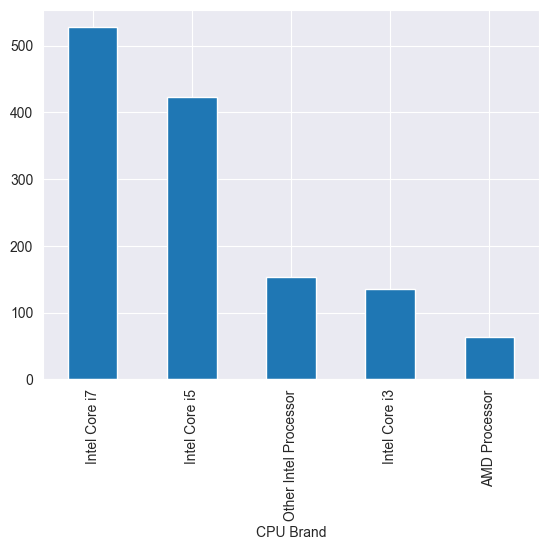

In [18]:
df['CPU Brand'].value_counts().plot(kind='bar')

In [103]:
df['CPU Brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [19]:
df.drop(columns=['CPU name' , 'Cpu'],inplace = True)

In [106]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand
336,Dell,Ultrabook,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,1.9kg,55890,0,1,141.211998,Intel Core i5
398,Dell,Workstation,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,144495,1,0,282.423996,Intel Core i7
536,Dell,Notebook,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,42486,0,0,141.211998,Intel Core i5
1209,Asus,Gaming,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.2kg,130482,0,0,141.211998,Intel Core i7
1168,HP,Notebook,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44kg,13266,0,0,111.935204,Other Intel Processor


In [107]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [20]:
df['Memory']=df['Memory'].str.replace('GB','').str.replace('TB','000').astype(str).replace('\.0','',regex=True)
new = df['Memory'].str.split('+',n=1, expand = True)

df['First'] = new[0] #first storage amount with storage type
df['First'] = df['First'].str.strip() #spaces removed from front and back

df['Second']=new[1] #second storage with storage type

df['Layer1HDD'] = df['First'].apply(lambda x : 1 if 'HDD' in x else 0 ) 
df['Layer1SSD'] = df['First'].apply(lambda x : 1 if 'SSD' in x else 0 )
df['Layer1Hybrid'] = df['First'].apply(lambda x : 1 if 'Hybrid' in x else 0 )
df['Layer1Flash_Storage'] = df['First'].apply(lambda x : 1 if 'Flash_Storage' in x else 0 )

df['First'] = df['First'].str.replace(r'\D+', '', regex=True)   #removing non numeric charecters
df['Second'].fillna('0',inplace= True) #replacing nan with 0
df['First'].fillna('0',inplace= True)

df['Layer2HDD'] = df['Second'].apply(lambda x : 1 if 'HDD' in x else 0 )
df['Layer2SSD'] = df['Second'].apply(lambda x : 1 if 'SSD' in x else 0 )
df['Layer2Hybrid'] = df['Second'].apply(lambda x : 1 if 'Hybrid' in x else 0 )
df['Layer2Flash_Storage'] = df['Second'].apply(lambda x : 1 if 'Flash_Storage' in x else 0 )

df['Second'] = df['Second'].str.replace(r'\D+', '', regex=True)   # removing non numeric charecters

df['First']=df['First'].astype(int)
df['Second']=df['Second'].astype(int)

df['HDD'] = df['First']*df['Layer1HDD']+df['Second']*df['Layer2HDD']
df['SDD'] = df['First']*df['Layer1SSD']+df['Second']*df['Layer2SSD']
df['Hybrid'] = df['First']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid']
df['Flash_Storage'] = df['First']*df['Layer1Flash_Storage']+df['Second']*df['Layer2Flash_Storage']

df.drop(columns=['First', 'Second' , 'Layer1HDD' , 'Layer1SSD' , 'Layer1Hybrid' ,'Layer1Flash_Storage', 'Layer2HDD' , 'Layer2SSD' , 'Layer2Hybrid' ,'Layer2Flash_Storage'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\dbzar\AppData\Local\Temp\ipykernel_9752\1997277933.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory']=df['Memory'].str.replace('GB','').str.replace('TB','000').astype(str).replace('\.0','',regex=True)
C:\Users\dbzar\AppData\Local\Temp\ipykernel_9752\1997277933.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Second'].fillna('0',inplace= True) #replacing nan with 0
C:\Users\dbzar\AppData\Local\Temp\

In [21]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage
950,HP,Workstation,8GB,8 SSD,Nvidia Quadro M1000M,Windows 10,2.0kg,119826,0,1,141.211998,Intel Core i7,0,8,0,0
167,Dell,Gaming,8GB,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,56502,0,0,141.211998,Intel Core i7,1000,128,0,0
1288,Asus,Notebook,4GB,500 HDD,Intel HD Graphics,Windows 10,2.2kg,19660,0,0,100.454670,Other Intel Processor,500,0,0,0
842,HP,Notebook,8GB,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.63kg,48484,0,0,106.113062,Intel Core i5,1000,0,0,0
278,Lenovo,Notebook,4GB,1000 HDD,Intel HD Graphics 520,Windows 10,2.8kg,26053,0,0,106.113062,Intel Core i3,1000,0,0,0


In [22]:
df.drop(columns=['Memory'],inplace=True)

In [156]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage
302,Lenovo,Notebook,6GB,Nvidia GeForce GTX 940M,Windows 10,2.8kg,34578,0,0,106.113062,Intel Core i5,1000,0,0,0


In [23]:
df['Ram']=df['Ram'].str.replace('GB','')

In [159]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage
146,HP,Ultrabook,8,Intel HD Graphics 515,Windows 10,0.97kg,107305,1,1,352.465147,Other Intel Processor,0,512,0,0


In [24]:
df['Weight']=df['Weight'].str.replace('Kg','')

In [166]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage
1156,MSI,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,79536,0,0,127.335675,Intel Core i7,1000,256,0,0


In [167]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [25]:
df['GPU Brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [170]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage,GPU Brand
776,Lenovo,Notebook,16,Nvidia Quadro M2000M,Windows 7,2.5kg,126273,0,0,282.423996,Intel Core i7,0,512,0,0,Nvidia
15,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,80908,0,1,226.983005,Intel Core i5,0,256,0,0,Intel
920,Dell,Notebook,4,AMD Radeon R5 M420,Windows 10,2.18kg,36496,0,0,100.454670,Intel Core i5,1000,0,0,0,AMD
987,Lenovo,Gaming,8,Nvidia GeForce GTX 1060,Windows 10,2.5kg,63349,0,1,141.211998,Intel Core i7,1000,128,0,0,Nvidia
1131,Lenovo,2 in 1 Convertible,8,Nvidia Quadro M500M,Windows 7,1.8kg,109244,1,1,157.350512,Intel Core i7,0,512,0,0,Nvidia


In [171]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [26]:
df = df[df["GPU Brand"]!='ARM']

In [175]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage,GPU Brand
472,Google,Ultrabook,8,Intel HD Graphics 615,Chrome OS,1.1kg,67932,1,0,234.507400,Intel Core i5,0,128,0,0,Intel
1115,Dell,Ultrabook,8,Intel Iris Plus Graphics 640,Windows 10,1.23kg,73473,0,0,165.632118,Intel Core i7,0,256,0,0,Intel
843,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,2.18kg,38041,0,0,100.454670,Intel Core i5,0,128,0,0,Intel
948,Dell,Notebook,4,AMD Radeon R7 M445,Windows 10,2.36kg,35111,0,0,106.113062,Intel Core i3,1000,0,0,0,AMD
927,HP,Notebook,8,Intel HD Graphics 520,Windows 10,2.31kg,62071,0,0,141.211998,Intel Core i5,0,256,0,0,Intel


In [176]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [27]:
def OS(inp):
    if inp == 'Windows 10' or inp == 'Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    elif inp == 'macOS' or inp == 'macOS X':
        return 'Mac'
    else:
        return 'Other/No OS/Linux'

In [28]:
df['OS'] = df['OpSys'].apply(OS)

In [184]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage,GPU Brand,OS
845,Dell,Notebook,4,AMD Radeon R5 M420,Windows 10,2.18kg,39373,0,0,141.211998,Intel Core i7,0,256,0,0,AMD,Windows
303,Lenovo,Notebook,8,Nvidia GeForce 940MX,No OS,2.2kg,29250,0,0,100.454670,Intel Core i5,2000,0,0,0,Nvidia,Other/No OS/Linux
661,Lenovo,Notebook,4,Intel HD Graphics 500,Windows 10,2.2kg,22324,0,0,100.454670,Other Intel Processor,500,0,0,0,Intel,Windows
1280,HP,Notebook,6,AMD Radeon R7 M440,Windows 10,2.04kg,29303,0,0,141.211998,AMD Processor,0,0,1000,0,AMD,Windows
195,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.5kg,48697,0,1,127.335675,Intel Core i5,1000,0,0,0,Nvidia,Windows


In [183]:
df['OS'].unique()

array(['Mac', 'Other/No OS/Linux', 'Windows'], dtype=object)

In [29]:
df.drop(columns=['Gpu'],inplace=True)

In [187]:
df.sample()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage,GPU Brand,OS
357,Dell,Gaming,8,Windows 10,2.65kg,53226,0,0,141.211998,Intel Core i5,1000,0,0,0,Nvidia,Windows


In [30]:
df.drop(columns=['OpSys'],inplace=True)

In [189]:
df.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage,GPU Brand,OS
497,HP,Notebook,8,1.48kg,93186,0,0,157.350512,Intel Core i7,0,1000,0,0,Intel,Windows


In [31]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [196]:
df.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage,GPU Brand,OS
1136,HP,Workstation,8,3,210424,0,1,127.335675,Intel Core i7,0,256,0,0,Nvidia,Windows


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   object 
 3   Weight         1302 non-null   object 
 4   Price          1302 non-null   int64  
 5   Touchscreen    1302 non-null   int64  
 6   IPS            1302 non-null   int64  
 7   PPI            1302 non-null   float64
 8   CPU Brand      1302 non-null   object 
 9   HDD            1302 non-null   int64  
 10  SDD            1302 non-null   int64  
 11  Hybrid         1302 non-null   int64  
 12  Flash_Storage  1302 non-null   int64  
 13  GPU Brand      1302 non-null   object 
 14  OS             1302 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 162.8+ KB


In [32]:
df['Ram']=df['Ram'].astype(int)

In [33]:
df['Weight']=df['Weight'].astype(float)

In [208]:
df.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,Hybrid,Flash_Storage,GPU Brand,OS
497,HP,Notebook,8,1.48,93186,0,0,157.350512,Intel Core i7,0,1000,0,0,Intel,Windows


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int64  
 3   Weight         1302 non-null   float64
 4   Price          1302 non-null   int64  
 5   Touchscreen    1302 non-null   int64  
 6   IPS            1302 non-null   int64  
 7   PPI            1302 non-null   float64
 8   CPU Brand      1302 non-null   object 
 9   HDD            1302 non-null   int64  
 10  SDD            1302 non-null   int64  
 11  Hybrid         1302 non-null   int64  
 12  Flash_Storage  1302 non-null   int64  
 13  GPU Brand      1302 non-null   object 
 14  OS             1302 non-null   object 
dtypes: float64(2), int64(8), object(5)
memory usage: 162.8+ KB


In [34]:
df.select_dtypes(include=['number']).corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253319
PPI              0.475368
HDD             -0.096892
SDD              0.670660
Hybrid           0.007942
Flash_Storage         NaN
Name: Price, dtype: float64

## 🔍 Feature Selection & Correlation Analysis  

1. **Removing 'Hybrid' and 'Flash_Storage' columns** as they exhibit **low or no correlation** with the target variable **'Price'**.  
2. **Investigating the impact of 'HDD'**:  
   - Although HDD is expected to have a **positive correlation** with price, it currently shows a **negative correlation**.  
   - We will **evaluate the model performance** with and without the 'HDD' feature.  
   - If including 'HDD' leads to **lower accuracy**, we will **remove it** from the dataset.  


In [35]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [250]:
df.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,GPU Brand,OS
265,Dell,2 in 1 Convertible,8,2.67,42570,1,0,141.211998,Intel Core i5,0,256,Intel,Windows


<Axes: xlabel='Price', ylabel='Count'>

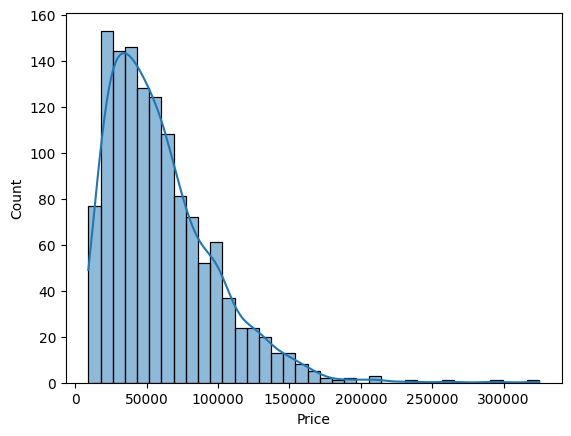

In [230]:
sns.histplot(df['Price'],kde=True)

**📊 Insight:**  
Most laptops are priced between **₹30,000 - ₹70,000**, with fewer high-end models above **₹1,50,000**, indicating a **right-skewed price distribution**.


<Axes: xlabel='Company'>

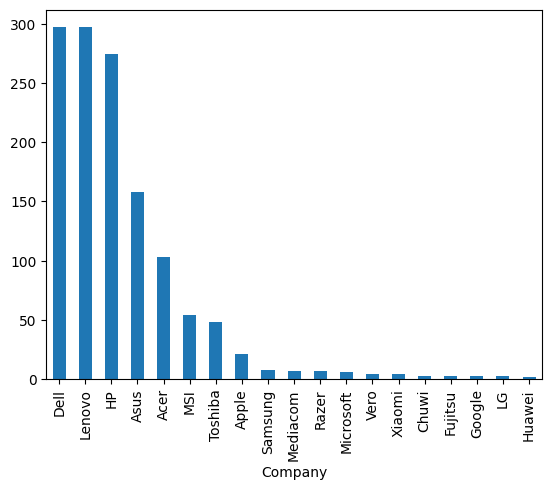

In [231]:
df['Company'].value_counts().plot(kind='bar')

## 📊 Laptop Brand Distribution Analysis  

1. **Dell, Lenovo, and HP dominate the market**, with the highest number of laptops in the dataset.  
2. **Asus and Acer follow as mid-tier brands**, contributing significantly but with a lower share than the top three.  
3. **MSI, Toshiba, and Apple have a moderate presence**, likely targeting specific segments such as gaming and premium users.  
4. **Brands like Samsung, Mediacom, Razer, and Microsoft hold a niche market share**, indicating their focus on specialized laptop categories.  
5. **Lesser-known brands like Vero, Xiaomi, Chuwi, and Huawei have minimal representation**, suggesting lower availability or demand.  


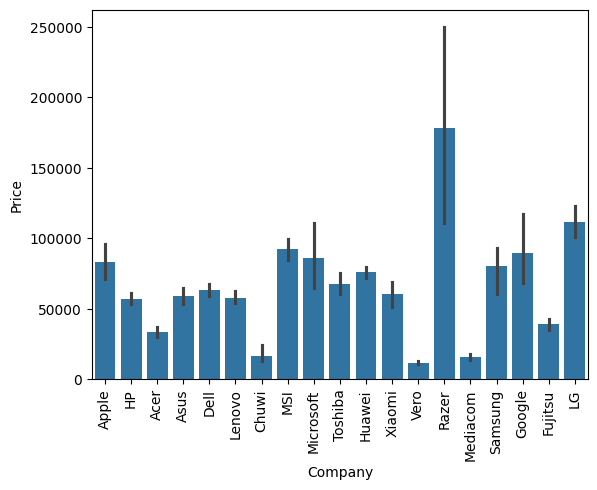

In [235]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## 💰 Laptop Price Distribution by Brand  

1. **Apple, Microsoft, Razer, and LG lead in premium pricing**, indicating their focus on high-end devices.  
2. **Razer exhibits the highest price variance**, suggesting a wide range of models from mid-tier to extreme gaming laptops.  
3. **HP, Dell, Asus, and Lenovo maintain mid-range pricing**, making them accessible for a broader audience.  
4. **Budget-friendly brands like Acer, Chuwi, and Mediacom offer more affordable options**, with relatively lower price variations.  
5. **Vero has the lowest average price**, signifying its presence in the entry-level segment.  


<Axes: xlabel='TypeName'>

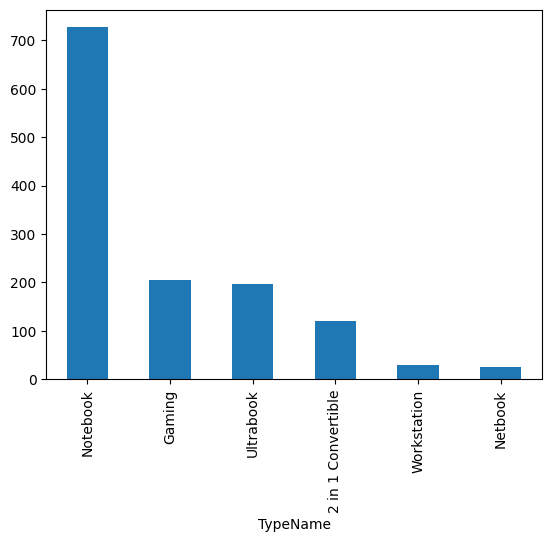

In [239]:
df['TypeName'].value_counts().plot(kind='bar')

## 💻 Laptop Distribution by Type  

1. **Notebooks dominate the market**, being the most common category, likely due to their versatility and affordability.  
2. **Gaming and Ultrabooks hold a significant share**, reflecting the rising demand for performance and portability.  
3. **2-in-1 Convertibles are moderately popular**, catering to users who need flexibility between tablet and laptop modes.  
4. **Workstations and Netbooks have minimal presence**, indicating niche usage, with workstations targeting professionals and netbooks being largely obsolete.  


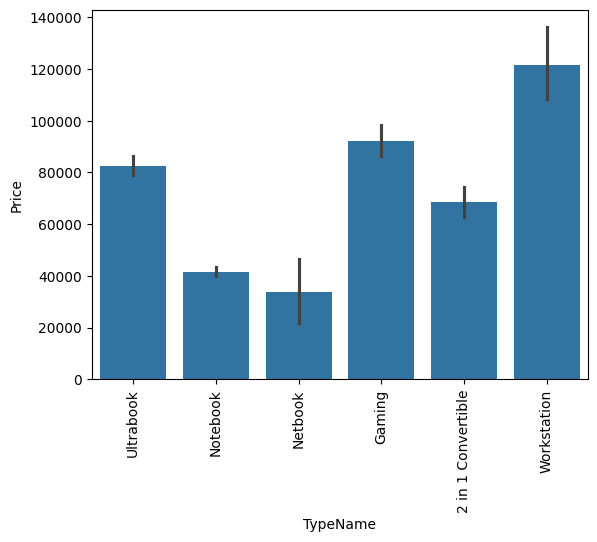

In [240]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## 💰 Average Price of Laptops by Type  

1. **Workstations are the most expensive**, averaging over ₹120,000, designed for professional tasks requiring high performance.  
2. **Gaming laptops follow closely**, priced around ₹100,000, catering to performance-demanding users.  
3. **Ultrabooks are premium yet portable**, averaging ₹85,000, appealing to business professionals.  
4. **2-in-1 Convertibles are mid-range**, costing about ₹70,000, suitable for users needing flexibility.  
5. **Notebooks and Netbooks are budget-friendly**, with Notebooks at ₹40,000 and Netbooks slightly cheaper but with lower specifications.  

🔹 *Conclusion: The price varies significantly by laptop type, depending on the target audience and hardware specifications.* 🚀  


<Axes: xlabel='PPI', ylabel='Price'>

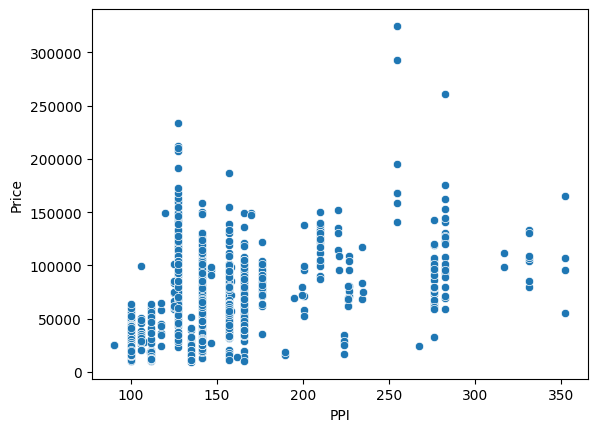

In [244]:
sns.scatterplot(x=df['PPI'],y=df['Price'])

## 📊 Relationship Between PPI and Laptop Price  

🔹 **Observation:**  
1. Laptops with **higher PPI (Pixels Per Inch)** tend to have **higher price ranges**, but price variations exist across all PPIs.  
2. The **majority of laptops fall between 100-200 PPI**, with prices ranging widely from budget to premium.  
3. A few **high-PPI models (250+ PPI)** exceed ₹300,000, indicating premium displays are usually found in high-end laptops.  

🔹 **Conclusion:**  
- While higher PPI often correlates with higher prices, other factors like **brand, hardware, and specifications** significantly impact the overall cost.  
- **Premium laptops** with high-resolution displays command a price premium.  

💡 *If you need affordability, mid-range PPI (around 150) offers good balance!* ✅  


<Axes: xlabel='Touchscreen'>

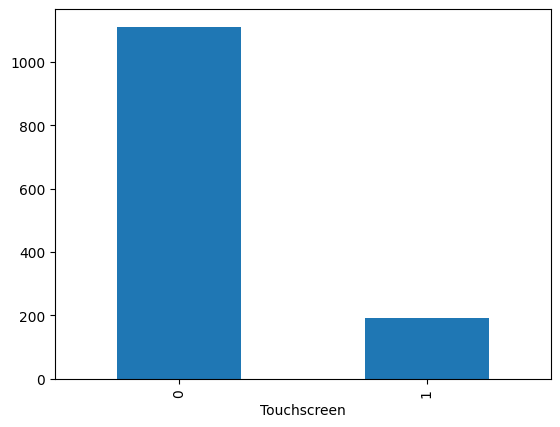

In [251]:
df['Touchscreen'].value_counts().plot(kind='bar')

## 📊 Touchscreen vs Non-Touchscreen Laptops  

🔹 **Observation:**  
1. The majority of laptops in the dataset are **non-touchscreen** (labeled as `0`), significantly outnumbering touchscreen models.  
2. **Touchscreen laptops** (labeled as `1`) form a much smaller portion of the market.  

🔹 **Conclusion:**  
- Touchscreen laptops are **less common** compared to traditional non-touchscreen models.  
- This could be due to **higher costs, different use cases, and consumer preferences** leaning towards non-touchscreen devices.  

💡 *Touchscreens are great for 2-in-1 convertibles, but if you don’t need them, a non-touchscreen laptop may be more cost-effective!* ✅  


<Axes: xlabel='Touchscreen', ylabel='Price'>

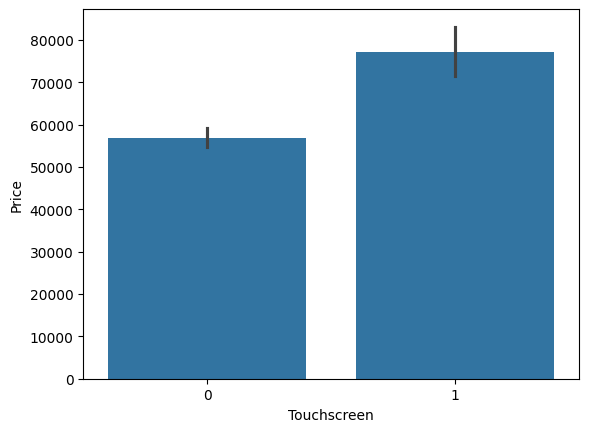

In [252]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

## 💰 Price Comparison: Touchscreen vs Non-Touchscreen Laptops  

🔹 **Observation:**  
1. **Touchscreen laptops** (`1`) are **more expensive**, with an average price **above ₹75,000**.  
2. **Non-touchscreen laptops** (`0`) are **cheaper**, averaging around **₹55,000**.  
3. There is a **visible error bar** in the touchscreen category, indicating some variation in pricing.  

🔹 **Conclusion:**  
- Touchscreen laptops generally cost **₹20,000+ more** than non-touchscreen ones.  
- The added price may be due to **better displays, 2-in-1 functionality, and premium features**.  
- If you **don’t need a touchscreen**, a non-touchscreen laptop can **save money** without sacrificing performance.  



<Axes: xlabel='IPS'>

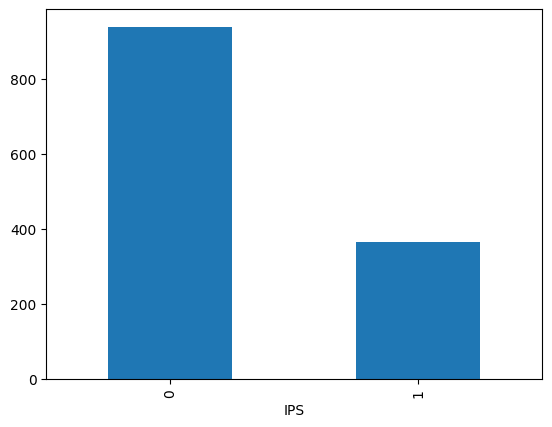

In [254]:
df['IPS'].value_counts().plot(kind='bar')

## 📊 IPS Display vs Non-IPS Display: Laptop Count  

🔹 **Observation:**  
1. **Non-IPS laptops** (`0`) are **much more common** in the dataset.  
2. **IPS laptops** (`1`) are significantly **fewer in number**.  

🔹 **Possible Reasons:**  
- **Non-IPS displays are cheaper**, making them a popular choice for budget and mid-range laptops.  
- **IPS displays offer better colors and viewing angles**, but they cost more.  
- Many **gaming and professional laptops** use **IPS panels** for better display quality.  


<Axes: xlabel='IPS', ylabel='Price'>

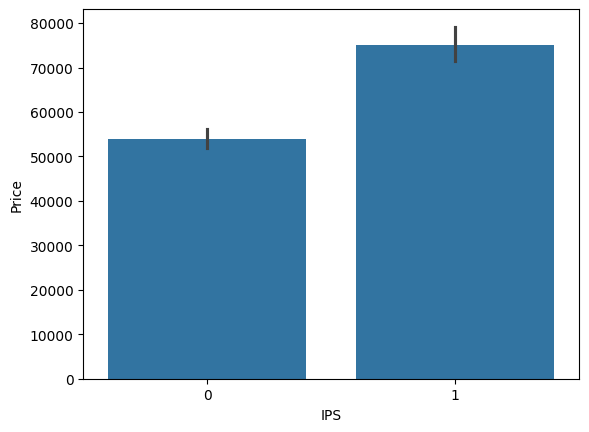

In [255]:
sns.barplot(x=df['IPS'],y=df['Price'])

## 💰 IPS vs Non-IPS Display: Price Comparison  

🔹 **Key Insights:**  
1. **Non-IPS laptops (`0`) have a lower average price** (~₹55,000).  
2. **IPS laptops (`1`) are more expensive**, with an average price of ~₹75,000.  
3. The **price variation (error bars) is slightly higher** for IPS displays.  

🔹 **Possible Reasons for Price Difference:**  
- **IPS displays offer better visuals** (color accuracy, contrast, and viewing angles).  
- IPS panels are **more expensive to manufacture** compared to TN or VA panels.  
- **High-end laptops** with **better specifications often include IPS displays**.  

💡 *If you want a **budget-friendly option**, go for a non-IPS laptop. But for **better display quality**, an IPS laptop is worth the investment!* ✅  

<Axes: xlabel='CPU Brand'>

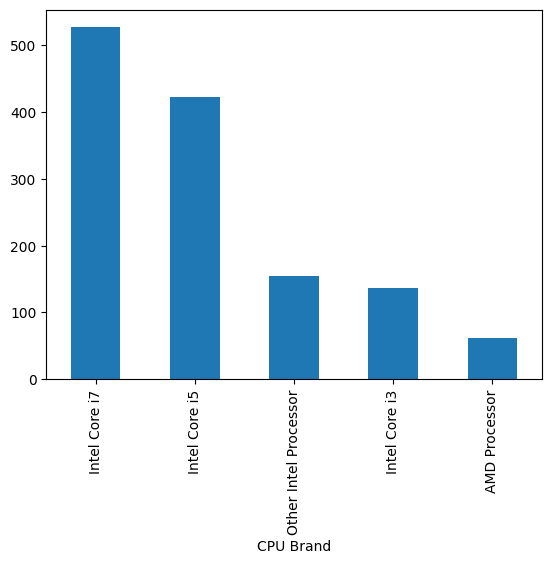

In [256]:
df['CPU Brand'].value_counts().plot(kind='bar')

## 🔥 CPU Popularity in Laptops  

🔹 **Key Insights:**  
1. **Intel dominates the market**, with Core i7 and Core i5 leading in popularity.  
2. **Intel Core i7 is the most preferred processor**, followed by Core i5.  
3. **Intel Core i3 and other Intel processors have moderate demand**, mainly for budget users.  
4. **AMD processors have the lowest presence** in this dataset, possibly due to fewer AMD-based laptop options.  

🔹 **Possible Reasons for Intel’s Popularity:**  
- **Strong brand reputation** and dominance in the laptop market.  
- **Better optimization** for performance and software compatibility.  
- **Higher availability** in a wide range of laptop models.  

💡 *If you're looking for **powerful performance**, go for an **Intel Core i7 or i5**. If you're on a **budget**, Intel Core i3 or AMD processors might be better options!* ✅  


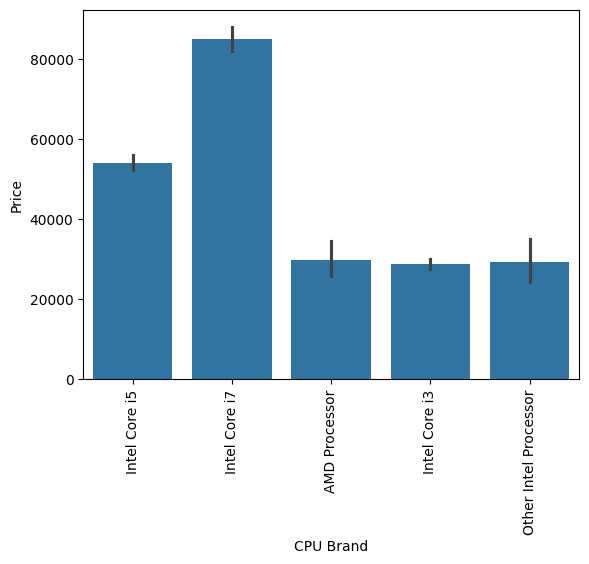

In [261]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## 💰 CPU Brand vs. Laptop Price Analysis  

🔹 **Key Takeaways:**  
1. **Intel Core i7 laptops are the most expensive**, averaging above ₹80,000.  
2. **Intel Core i5 laptops are mid-range**, with prices around ₹55,000.  
3. **AMD, Intel Core i3, and Other Intel Processors fall in the budget segment**, averaging between ₹25,000 - ₹30,000.  
4. **Price variation is higher in AMD and Other Intel processors**, possibly due to a wider range of models and configurations.  

🔹 **Choosing the Right CPU Based on Budget:**  
- **High performance (₹80,000+):** Intel Core i7  
- **Balanced performance (₹50,000 - ₹60,000):** Intel Core i5  
- **Budget-friendly (₹25,000 - ₹35,000):** Intel Core i3 or AMD  

💡 *If you need a high-end laptop for gaming, editing, or heavy tasks, go for **Intel Core i7**. If you're looking for a budget-friendly option, **Intel Core i3 or AMD** might be the right choice!* ✅  


<Axes: xlabel='Ram'>

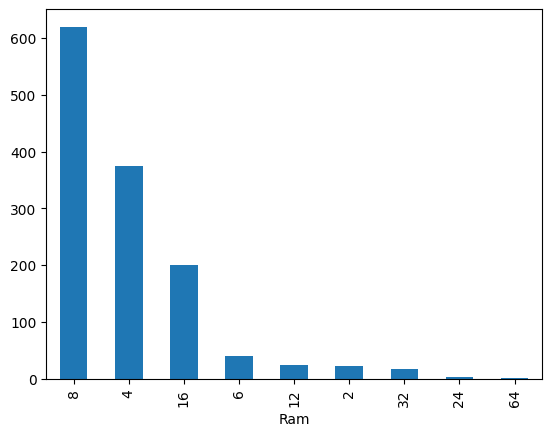

In [262]:
df['Ram'].value_counts().plot(kind='bar')

## 📊 RAM Size Distribution in Laptops  

🔹 **Key Observations:**  
1. **8GB RAM is the most popular choice**, followed by **4GB and 16GB**.  
2. **Very few laptops have 2GB, 6GB, 12GB, 24GB, 32GB, or 64GB RAM**, indicating they are either outdated (low RAM) or high-end professional models (large RAM).  
3. **Most users prefer 8GB RAM**, likely due to its balance between performance and cost.  

🔹 **Choosing the Right RAM for Your Needs:**  
- **Basic usage (Browsing, MS Office, YouTube, etc.)** → 4GB or 6GB  
- **Multitasking, casual gaming, and light editing** → 8GB  
- **Professional work, video editing, and gaming** → 16GB or more  

💡 *For most users, **8GB RAM is the sweet spot**, but if you’re into gaming or editing, consider **16GB+ RAM** for smooth performance!* 🚀✅  


<Axes: xlabel='Ram', ylabel='Price'>

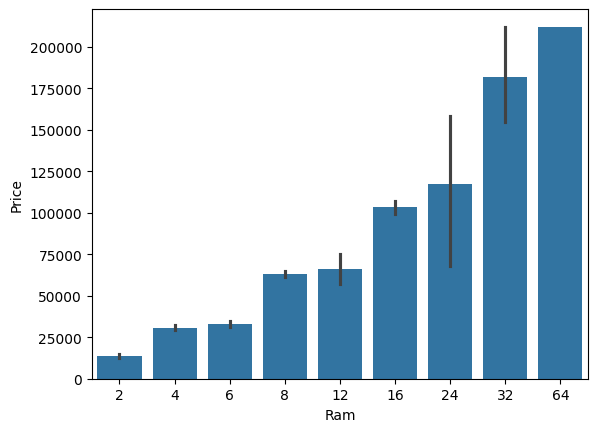

In [263]:
sns.barplot(x=df['Ram'],y=df['Price'])

## 📊 Laptop Price vs. RAM Analysis  

### 🔍 Key Insights  
- 💾 **RAM Capacity Correlates with Pricing** – Laptops with *32 GB+ RAM* are significantly more expensive.  
- 📉 **8 GB & 16 GB RAM Configurations Dominate** – Optimal balance between cost and performance for mainstream users.  
- ⚠ **Premium Models (24 GB+ RAM) Exhibit High Price Variability**, influenced by additional hardware specifications.  

### ✅ RAM Recommendations by Use Case  
- 🖥 **Basic Productivity (Browsing, Office Applications)** → *4-6 GB*  
- 🎮 **Multitasking & Gaming** → *8-16 GB*  
- 🏆 **Professional Workloads (Content Creation, AI/ML, High-End Gaming)** → *16-64 GB*  

💡 *For most users, 8 GB RAM is sufficient, while power users should opt for 16 GB or more to ensure optimal performance.*  


<Axes: xlabel='GPU Brand'>

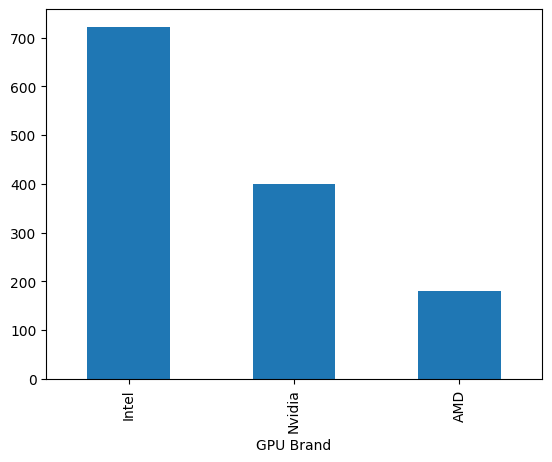

In [264]:
df['GPU Brand'].value_counts().plot(kind='bar')

## 📊 GPU Brand Distribution  

### 🔍 Key Insights  
- 💾 **Intel GPUs dominate** – Highest presence in the dataset, likely integrated graphics.  
- 🎮 **Nvidia GPUs hold a strong share** – Common in gaming and high-performance laptops.  
- ⚠ **AMD GPUs have the lowest representation**, possibly due to market positioning.  

💡 *Intel is the most common, but Nvidia is the preferred choice for performance-focused users.*  


<Axes: xlabel='GPU Brand', ylabel='Price'>

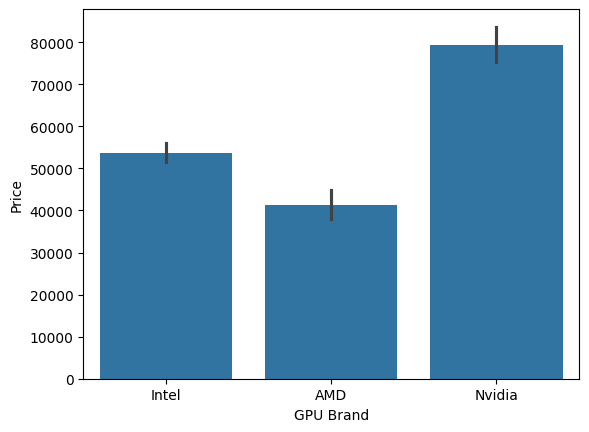

In [269]:
sns.barplot(x=df['GPU Brand'],y=df['Price'])


## 📊 GPU Brand vs. Laptop Price  

### 🔍 Key Insights  
- 💾 **Nvidia GPUs are associated with the highest prices**, likely due to their use in gaming and high-performance laptops.  
- 🎮 **Intel GPUs have moderate pricing**, suggesting a balance between affordability and performance.  
- ⚠ **AMD GPUs show the lowest average price**, indicating a focus on budget-friendly and mid-range segments.  

💡 *For high-end performance, Nvidia GPUs are the most expensive, while AMD offers cost-effective alternatives.*  


(array([0, 1, 2]),
 [Text(0, 0, 'Windows'), Text(1, 0, 'Other/No OS/Linux'), Text(2, 0, 'Mac')])

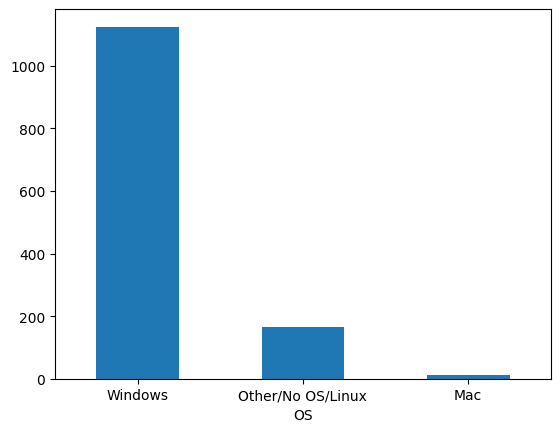

In [272]:
df['OS'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')

## 📊 Laptop Distribution by Operating System  

### 🔍 Key Insights  
- 💾 **Windows dominates the market**, with the highest number of laptops.  
- 🖥 **Other OS/No OS/Linux has a small but notable presence**, often found in budget and developer-focused laptops.  
- ⚠ **Mac laptops have the lowest representation**, likely due to their premium pricing and specific user base.  

💡 *Windows remains the most widely used OS, while Mac is niche, and Linux appeals to a specialized audience.*  


<Axes: xlabel='OS', ylabel='Price'>

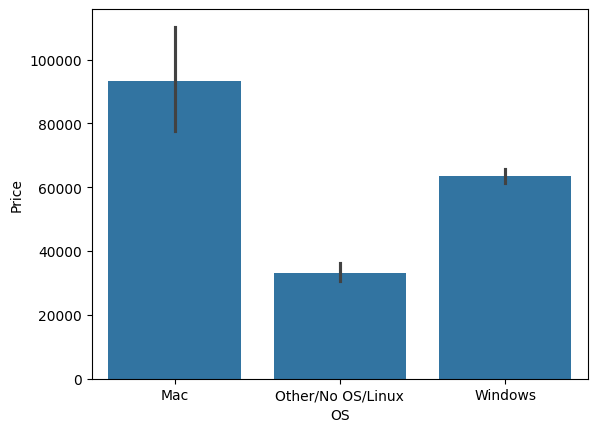

In [273]:
sns.barplot(x=df['OS'],y=df['Price'])

## 📊 Operating System vs. Laptop Price  

### 🔍 Key Insights  
- 💾 **Mac laptops have the highest average price**, with significant price variability, indicating premium positioning.  
- 🖥 **Windows laptops are moderately priced**, offering a balance between affordability and performance.  
- ⚠ **Other OS/No OS/Linux laptops are the most budget-friendly**, often targeting developers and cost-conscious users.  

💡 *MacBooks are premium-priced, Windows offers diverse pricing, while Linux-based systems are the most economical.*  


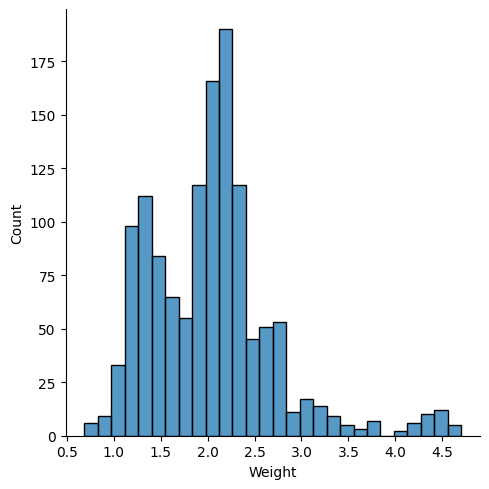

In [282]:
sns.displot(df['Weight'])

## 📊 Laptop Weight Distribution  

### 🔍 Key Insights  
- 💾 **Most laptops weigh between 1.5 kg and 2.5 kg**, indicating a standard range for mainstream models.  
- 🖥 **Ultrabooks and lightweight models (<1.5 kg) are less common**, Except higher count near 1.3Kg. 
- ⚠ **Heavier laptops (3 kg+) exist but are rare**, likely representing gaming or workstation-class devices.  

💡 *The majority of laptops fall in the 2 kg range, balancing portability and performance.*  


<Axes: xlabel='Weight', ylabel='Price'>

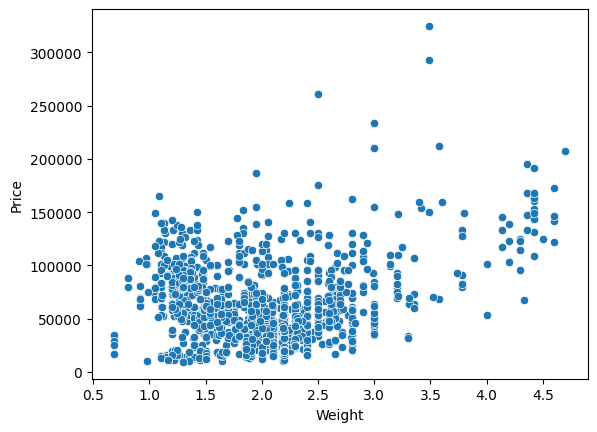

In [283]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

## 📊 Laptop Weight vs. Price  

### 🔍 Key Insights  
- 💾 **Most laptops weigh between 1 kg and 2.8 kg**, with a wide price distribution.  
- 🎮 **Heavier laptops (3 kg+) tend to be more expensive**, likely representing gaming and workstation models.  
- ⚠ **Lighter laptops (<1.5 kg) also show premium pricing**, indicating high-end ultrabooks.  
-   **weak positive correlation between laptop weight and price**

💡 *Both lightweight ultrabooks and heavy gaming laptops command premium prices, while mid-weight models dominate the affordable range.*  


<Axes: >

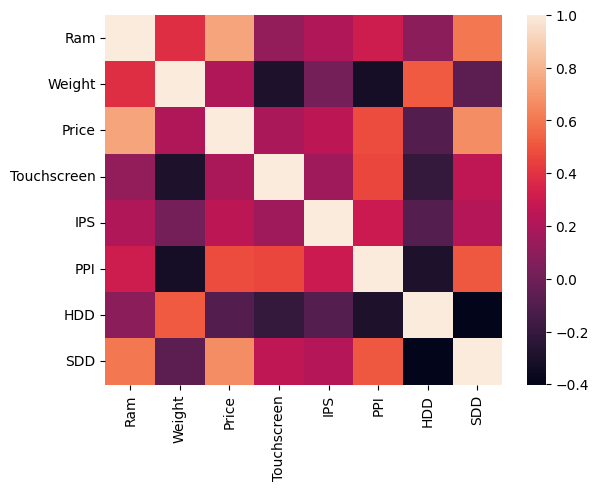

In [285]:
sns.heatmap(df.select_dtypes(include='number').corr())

## 📊 Laptop Feature Correlation Heatmap  

### 🔍 Key Insights  
- 💾 **RAM and Price show a strong positive correlation**, indicating that higher RAM configurations lead to increased costs.  
- 📈 **SSD has a negative correlation with HDD**, as laptops typically use one over the other.  
- 🖥 **PPI (Pixel Density) positively correlates with Price**, highlighting that higher-resolution displays are more expensive.  
- ⚠ **Weight has a moderate correlation with Price**, suggesting that heavier laptops (workstations/gaming) often cost more.  

💡 *RAM, SSD, and high-resolution displays are key price drivers, while HDDs are inversely related to SSD usage.*  


C:\Users\dbzar\AppData\Local\Temp\ipykernel_7812\3329408040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

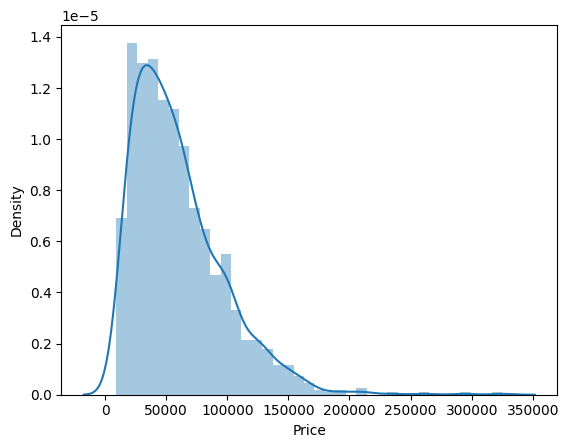

In [289]:
sns.distplot((df['Price']))

## 📊 Right-Skewed Price Distribution  

### 🔍 Observations  
- The **price distribution is right-skewed**, meaning most laptops are in the lower price range, with a few high-priced models causing a long tail.  
- This skewness can **affect statistical modeling and machine learning algorithms**, leading to biased predictions.

### 🔄 Normalization Approach  
To improve the distribution, we will apply **log transformation or Box-Cox transformation** to make the data more normally distributed.

### ✅ Benefits of Normalization  
- **Enhances Model Performance** 🚀: Many algorithms (e.g., linear regression) assume normality for better accuracy.  
- **Reduces Variance Impact** 📉: Helps manage outliers and stabilize variance.  
- **Improves Interpretability** 📊: Easier to analyze relationships between variables.  

💡 *By normalizing, we ensure robust statistical analysis and better predictive insights.*  


C:\Users\dbzar\AppData\Local\Temp\ipykernel_7812\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

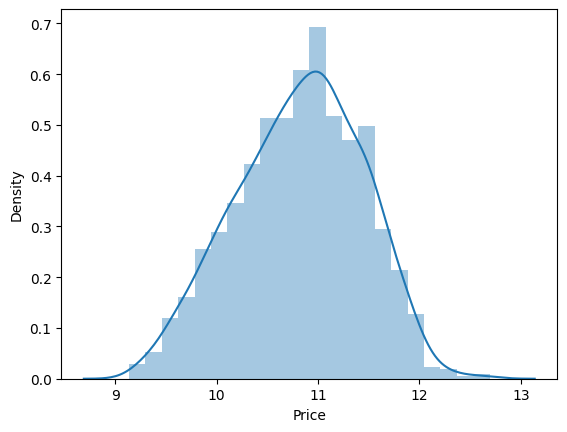

In [290]:
sns.distplot(np.log(df['Price']))

## 🧩 Train-Test Split: Preparing Data for Model Training  


In [36]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [293]:
X.sample()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CPU Brand,HDD,SDD,GPU Brand,OS
499,Lenovo,Notebook,8,2.3,0,1,141.211998,Intel Core i5,0,256,Intel,Windows


In [295]:
y.sample(5)

829     10.403657
1041     9.326433
92      11.063132
172      9.708871
1267    10.667629
Name: Price, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [2]:
X_train.sample(5)

NameError: name 'X_train' is not defined

### 🔍 What is One-Hot Encoding?  
One-Hot Encoding transforms categorical data into **binary vectors**, allowing machine learning models to process non-numeric features effectively.  

### 🎯 Why Use It?  
- **Prepares Data for Models** 🤖: Converts text labels into numerical form.  
- **Prevents Ordinal Misinterpretation** 🚫: Avoids false ranking in categorical variables.  
- **Enhances Algorithm Compatibility** 🔄: Works well with most ML models.  

💡 *One-Hot Encoding is the brushstroke that paints categorical data into a machine-readable masterpiece!* 🎨  


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  
from sklearn.metrics import r2_score, mean_absolute_error  

# 🚀 **Machine Learning Pipeline: One-Hot Encoding + Linear Regression**

This **pipeline** automates feature **transformation** and **model training** using **`ColumnTransformer`**, **`OneHotEncoder`**, and **`LinearRegression`**.

---

## 🛠 **Step 1: Feature Transformation with `ColumnTransformer`**
🔹 **Applies `OneHotEncoder()` to categorical variables**, converting them into numerical form.  
🔹 `transformers` is a **list of transformations** applied to specific columns.

### 🔑 **Key Components:**
| Parameter | Description |
|-----------|------------|
| 🎯 **First Parameter** | Name of the transformation (`'col_tfm'`) |
| 🔄 **Second Parameter** | `OneHotEncoder()`, applies categorical encoding |
| 📌 **Third Parameter** | List of column indices `[0,1,7,10,11]` to transform |

### ⚙ **One-Hot Encoder Settings:**
✅ `sparse_output=False` → Returns a **NumPy array** instead of a sparse matrix.  
✅ `drop='first'` → Drops the **first category** to prevent multicollinearity.  
✅ `remainder='passthrough'` → Keeps **non-categorical columns unchanged**.  

---

## 📈 **Step 2: Model Training with `LinearRegression()`**
🔹 `Step2` creates an instance of **Linear Regression**, which learns relationships between features and target values.

---

## 🔄 **Step 3: Automating with `Pipeline`**
`Pipeline()` **simplifies preprocessing and model training** by executing a sequence of transformations **in order**.

Execution of **transformation** and **modeltraining**
pipe.fit(X_train, y_train)  

## Evaluation of model
📊 **R² Score (`r2_score`)** → Measures how well the model explains variance in the target; **closer to 1 means better accuracy**.  

📉 **Mean Absolute Error (`MAE`)** → Calculates the **average absolute difference** between actual and predicted values; **lower is better**.  


In [ ]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = LinearRegression()
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8074755451106762
MAE 0.2095356446444036


In [44]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 =Ridge(alpha=10)
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8130105322926247
MAE 0.20948050730519963


In [45]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = KNeighborsRegressor(n_neighbors=3)
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8008098744042611
MAE 0.1941532400099745


In [50]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = DecisionTreeRegressor(max_depth=8)
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8392319721146759
MAE 0.18237271921544382


In [51]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8081239550353497
MAE 0.2027583737166636


In [71]:
Step1 = ColumnTransformer(transformers=[
    ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

Step2 = RandomForestRegressor(
                            n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15
)

pipe = Pipeline([
    ('step1',Step1),
    ('step2',Step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.885961366883367
MAE 0.15986297411872033


In [55]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = ExtraTreesRegressor(
#                             n_estimators=100,
#                             random_state=3,
#                             max_samples=0.5,
#                             max_features=0.75,
#                             max_depth=15,
#                             bootstrap=True
# )
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8866963622569379
MAE 0.16071660646470737


In [56]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = AdaBoostRegressor(
#                             n_estimators=100,
#                             learning_rate=1.0
# )
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8069400837470742
MAE 0.22248207597950856


In [1]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = GradientBoostingRegressor(
#                             n_estimators=500
# )
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

NameError: name 'ColumnTransformer' is not defined

In [74]:
# Step1 = ColumnTransformer(transformers=[
#     ('col_tfm',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')
#
# Step2 = XGBRegressor(n_estimators=50, max_depth = 5, learning_rate= 0.3)
#
# pipe = Pipeline([
#     ('step1',Step1),
#     ('step2',Step2)
# ])
#
# pipe.fit(X_train,y_train)
#
# y_pred = pipe.predict(X_test)
#
# print('r2_score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8886238563070588
MAE 0.15768670834066817


# Exporting Model

In [72]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [43]:
print(df.dtypes)

Company         object
TypeName        object
Ram              int64
Weight         float64
Price            int64
Touchscreen      int64
IPS              int64
PPI            float64
CPU Brand       object
HDD              int64
SDD              int64
GPU Brand       object
OS              object
dtype: object


NameError: name 'df' is not defined